# CCE2502 Assignment II - Logistic Regression
### Year 2024-2025- Semester II



A number of functions are given, including the partially completed gradient descent optimizer.

Please follow instructions in the assignment specifications document.


In [18]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Do not carry out any changes to the code in this cell

def lr_loss_function(y_target,y_predicted):
    """
    y_target: actual gold labels (vector of size(m,))
    y_predicted : predicted probabilities for positive class (vector of size (m,))
    returns categorical cross entropy loss
    """
    m=y_target.shape[0]
    L = -(y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum()/m
    return L


def predict_y_prob(W,D):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    D is the feature matrix [m,N] where m is the number of examples
    return a vector of size (m,1)
    """
    m = D.shape[0]
    bias = np.ones([m,1], dtype=float)
    X = np.concatenate((bias,D),axis=1)
    z = np.matmul(W.T,X.T)
    y = 1/(1+np.exp(-z))
    #
    return y.T

def get_accuracy(W,X,y):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    X is the feature matrix [m,N] where m is the number of examples
    y is the gold label vector of size (m,)
    Computes and returns the accuracy in predicting the positive class and returns a scalar
    """
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    #
    return (Y_pred.ravel()==y).astype(int).sum()/y.shape[0]

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    p1, p2 = plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    plt.legend([p1,p2], ['Train loss','Val loss'])
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

# Use this function for plotting datasets as scatter graphs
def data_scatter_plot(X,y):
    """
    Plots a scatter graph for a 2-D dataset
    X : Feature numpy array of size (m,N), 
            m=number of examples (rows)
            N = number of features (columns)
            If N>2, first two features taken in consideration
    y : Output label numpy array of size (m,1) or (m,)
    """
    mk ={0:'or', 1:'ob'}
    plt.plot(X[:,0][y[:]==0] , X[:,1][y[:]==0], mk[0])
    plt.plot(X[:,0][y[:]==1] , X[:,1][y[:]==1], mk[1])

In [20]:
# Gradient Descent algorithm that learns the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    phi : regularisation constant
    W : weights vector
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    if split_frac < 0.0:
        y_train, y_val, X_train, X_val = y_data, y_data, X_data, X_data
    else:
        split = int(y_data.shape[0]*split_frac)
        y_train, y_val, X_train, X_val  = y_data[0:split], y_data[split:], X_data[0:split], X_data[split:]
    #
    N = X_data.shape[1] # number of features
    print("Number of input features :",N)
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N+1,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to the same value
    print("Initial Weights:",W)
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))
        #
        #
        #######################################################################
        #
        # Add update equations in this section 
        # W[0] is the bias term (no regularisation)
        #
        #######################################################################
    #
    #
    return {'weights':W, 
            'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

## TASK 1

X shape: (1000, 2)
y shape: (1000,)


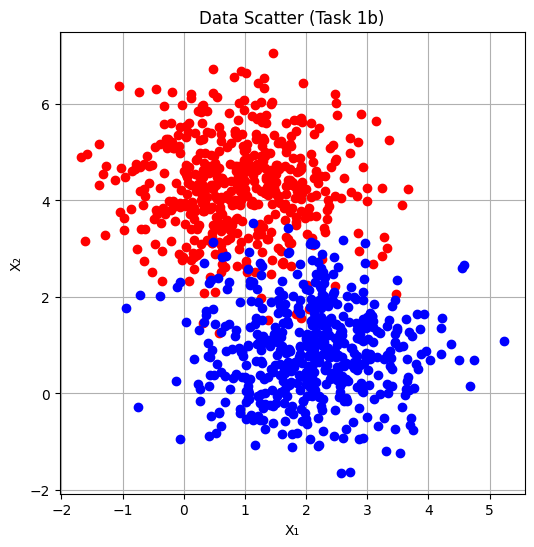

In [21]:
import csv
import numpy as np

# Load the basic binary classification dataset
X, y = [], []
with open('binary_classification_basic.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header if present
    for row in reader:
        X.append([float(row[0]), float(row[1])])
        y.append(int(float(row[2])))  # Convert '0.0' or '1.0' to int

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# 1b) Scatter‐plot
plt.figure(figsize=(6,6))
data_scatter_plot(X, y)
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.title('Data Scatter (Task 1b)')
plt.grid(True)
plt.show()


In [ ]:
# 1e) Train the model
#    lr_train_model will internally prepend its own bias column
res = lr_train_model(
    X, y,
    no_iterations=100,
    alpha=0.1,
    phi=0.01,
    reshuffle='yes',
    split_frac=0.8,
    init_weights=0.0
)

# Unpack
W_full   = np.array(res['weights']).reshape(-1)  # [b, w1, w2]
b, w_vec = W_full[0], W_full[1:]
hist     = res['history']

# Plot train/val loss curves
plt.figure()
plt.plot(hist['train_loss'], label='Train Loss')
plt.plot(hist['val_loss'],   label='Val   Loss')
plt.xlabel('Iteration'); plt.ylabel('Loss')
plt.legend(); plt.title('Loss Curves (Task 1e)')
plt.show()

print(f"Train acc = {res['train_acc']:.3f},  Val acc = {res['val_acc']:.3f}")

# 1f) Decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
grid    = np.c_[xx.ravel(), yy.ravel()]              # (40000,2)
logits  = grid.dot(w_vec) + b                        # (40000,)
probs   = 1/(1 + np.exp(-logits))
Z       = probs.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='red')
data_scatter_plot(X, y)
plt.title("Decision Boundary (Task 1f)")
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.show()

## TASK 2


In [ ]:
# 2a) Load the advanced dataset
X_adv, y_adv = [], []
with open('binary_classification_advanced.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    next(reader, None)  # skip header
    for row in reader:
        X_adv.append([float(row[0]), float(row[1])])
        y_adv.append(int(float(row[2])))
X_adv = np.array(X_adv)
y_adv = np.array(y_adv)

# 2b) Scatter‐plot
plt.figure(figsize=(6,6))
data_scatter_plot(X_adv, y_adv)
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.title('Task 2b: Advanced Data Scatter')
plt.grid(True)
plt.show()

# 2c) Baseline logistic regression on non‐linear data
res_adv = lr_train_model(
    X_adv, y_adv,
    no_iterations=100,
    alpha=0.1,
    phi=0.01,
    reshuffle='yes',
    split_frac=0.8,
    init_weights=0.0
)

# display training/validation loss & accuracy
display_results(res_adv)

# superimpose decision boundary to diagnose poor fit
W_full = np.array(res_adv['weights']).reshape(-1)
b, w_baseline = W_full[0], W_full[1:]

# build grid over feature space
xx, yy = np.meshgrid(
    np.linspace(X_adv[:,0].min()-1, X_adv[:,0].max()+1, 200),
    np.linspace(X_adv[:,1].min()-1, X_adv[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = 1/(1 + np.exp(-(grid.dot(w_baseline) + b)))
Z     = probs.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='red')
data_scatter_plot(X_adv, y_adv)
plt.title('Task 2c: Baseline Logistic Decision Boundary')
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.show()

Ellipsis

In [ ]:
# %% [code]
# 2d) Manual feature: recentered radius^2

# 1) Compute the data‐centroid (centre of the “donut”)
centre = X_adv.mean(axis=0)       # [μ1, μ2]

# 2) Recenter and form r^2 = (x1−μ1)^2 + (x2−μ2)^2
u     = X_adv[:,0] - centre[0]
v     = X_adv[:,1] - centre[1]
r2_c  = u**2 + v**2
X_rad = r2_c.reshape(-1,1)        # shape (m,1)

# 3) (Optional) Visualize how r^2 separates classes
plt.figure()
plt.scatter(r2_c, y_adv, c=y_adv, cmap='bwr', alpha=0.6)
plt.xlabel('Recentered r²')
plt.ylabel('Class label')
plt.title('r² vs Class (after recentering)')
plt.show()

# 4) Train logistic on this single feature
res_radial = lr_train_model(
    X_rad, y_adv,
    no_iterations = 100,
    alpha         = 0.01,   # smaller LR for stability
    phi           = 0.01,
    reshuffle     = 'yes',
    split_frac    = 0.8,
    init_weights  = 0.0
)

# 5) Inspect loss & accuracy
display_results(res_radial)

# 6) Plot the circular boundary back in (x₁,x₂)
Wf     = res_radial['weights'].reshape(-1)   # [b, w_r]
b_r, w_r = Wf[0], Wf[1]

# radius threshold r0 satisfies w_r * r0^2 + b_r = 0
r0     = np.sqrt(-b_r / w_r)

# parametric circle around (μ1,μ2)
theta    = np.linspace(0, 2*np.pi, 200)
circle_x = centre[0] + r0 * np.cos(theta)
circle_y = centre[1] + r0 * np.sin(theta)

plt.figure(figsize=(6,6))
data_scatter_plot(X_adv, y_adv)
plt.plot(circle_x, circle_y, 'g--', linewidth=2)
plt.title('Task 2d: Centered‐Radial Decision Boundary')
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.axis('equal')
plt.show()

## TASK 3

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# 3b) MLP on the “donut” data, with manual feature‐scaling

# assume X_adv, y_adv are already loaded, and np, plt, data_scatter_plot are in scope

# 1) Manual standardization (μ and σ along each column)
mu    = X_adv.mean(axis=0)
sigma = X_adv.std(axis=0)
X_scaled = (X_adv - mu) / sigma

# 2) Train/validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_scaled, y_adv, test_size=0.2, random_state=42
)

# 3) Define & train the MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='tanh',
    solver='adam',
    alpha=0.01,
    max_iter=1000,
    random_state=42
)
mlp.fit(X_tr, y_tr)

# 4) Print accuracies
print(f"Train accuracy: {mlp.score(X_tr,y_tr):.3f},  Val accuracy: {mlp.score(X_val,y_val):.3f}")

# 5) Plot the learned decision boundary
#    — build grid in original feature space —
xx, yy = np.meshgrid(
    np.linspace(X_adv[:,0].min()-1, X_adv[:,0].max()+1, 300),
    np.linspace(X_adv[:,1].min()-1, X_adv[:,1].max()+1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

#    — scale the grid with the same μ/σ —
grid_scaled = (grid - mu) / sigma

#    — predict probability of class 1 —
probs = mlp.predict_proba(grid_scaled)[:,1]
Z     = probs.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='purple')
data_scatter_plot(X_adv, y_adv)
plt.title('Task 3b: MLP Decision Boundary')
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.show()

Ellipsis